# Machine Intelligence 2 
## Exercise Sheet 1: Principal Component Analysis
### Coding Solutions

Note: To obtain more concise code you can create several functions or even a class that contain(s) operations that you perform in all tasks. However, to make things clearer and to allow you to train using PCA I only do this partially in H1.4.

In [2]:
# import libraries that we are going to use
import numpy as np
import matplotlib.pyplot as plt
import os # for H4.1
from PIL import Image #for H4.1

from matplotlib.collections import LineCollection
plt.rcParams.update({
    "text.usetex": False,  # Enable LaTeX rendering
    "font.family": "serif",  # Use serif fonts
    "font.serif": ["Times New Roman"],  # Match LaTeX default
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}) # just some global font settings for matplotlib (not necessary)


### H1.1

#### (a) Load the dataset pca-data-2d.dat and create a scatter plot of the centered data.

Data Shape:  (10, 2)


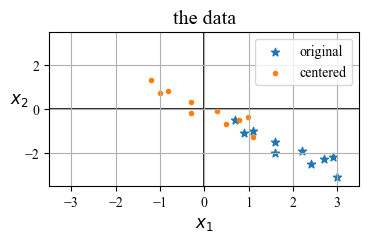

In [ ]:
# load the data into a numpy array
pca_data_2d = np.loadtxt('data/pca-data-2d.dat')
print("Data Shape: ",pca_data_2d.shape) # (always helpful to check the shape of the data, in case unsure, here: 10x2)

# center data: we substract the mean of the data along the axis of observations
pca_data_2d_C=pca_data_2d-pca_data_2d.mean(axis=0)

# now we plot the original and the centered data with matplotlib
fig1=plt.figure(figsize=(4,2)) # figure size incorporated in the graphic
plt.scatter(pca_data_2d[:,0],pca_data_2d[:,1],marker='*',label='original')
plt.scatter(pca_data_2d_C[:,0],pca_data_2d_C[:,1],marker='.',label='centered') # data plotted, with markers and labels
plt.grid() # grid added
ax = plt.gca()  # Get axes to use axhline
ax.axhline(0, color='black', linewidth=1.2, zorder=0) 
ax.axvline(0, color='black', linewidth=1.2, zorder=0) # with thicker center axes
plt.legend() # legend added
plt.xlim((-3.5,3.5))
plt.ylim((-3.5,3.5)) # limits of axes added
plt.xlabel('$x_1$')
plt.ylabel('$x_2$').set_rotation(0) # labels for axes added
plt.title("the data")
plt.show()

#### (b) Determine the Principal Components (PCs) and create another scatter plot of the same data points in the coordinate system spanned by the 2 PCs.

Principal Components: [[ 0.73517866  0.6778734 ]
 [-0.6778734   0.73517866]]


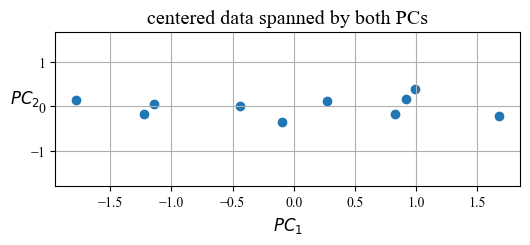

In [ ]:
# find PCs
C=np.cov(pca_data_2d_C, rowvar= False) # calculate covariance matrix (rowvar adapts function to our data shape)
# OR: cov_matrix = np.matmul(data_centered.T, data_centered) / data.shape[0] # - 1 when using sample covariance

evals,PCs=np.linalg.eig(C) # calculate eigenvalues and PCs, np.linalg already normalizes PCs
print("Principal Components:",PCs)
# make sure PCs are ordered in descending Eval order (not necessary if only 2 PCs)
sorter=np.argsort(evals)[::-1] # sorted indices of evals in descending order
evals=evals[sorter] # sorted evals
PCs=PCs[:,sorter] # sorted PCs(for numpy.linalg.eig each PC is a column)


# project data onto PCs by calculating projection coordinates (again: bc we used np.linalg.eig: columns are PCs)
u1=pca_data_2d_C@PCs # resulting column1 is projection on PC1, column2 for PC2

# plot again assuming PCs form coordinate system (so just need to plot projection coordinates)
fig2=plt.figure(figsize=(6,2))
plt.scatter(u1[:,0],u1[:,1])
plt.ylim(np.min(u1[:,0]),np.max(u1[:,0]))
plt.grid()
plt.xlabel('$PC_1$')
plt.ylabel('$PC_2$').set_rotation(0)
plt.title("centered data spanned by both PCs")
plt.show()

#### (c) Plot the reconstruction of the data in the original coordinate system when using (i) only the first or (ii) only the second PC for reconstruction.

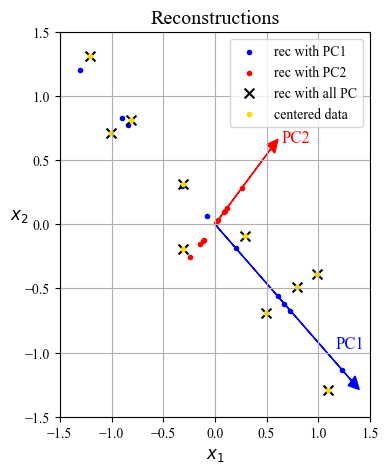

In [16]:
# reconstruction with all PCs (same as original data, bc we use all PCs)
pca_data_2d_Crec=PCs@u1.T
# reconstruction using one PC as direction and the projection of data points on it as length in this direction
# with PC1
pca_data_2d_Crec1=PCs[:,0].reshape(2,1)@u1[:,0].reshape(1,10)
# with PC2
pca_data_2d_Crec2=PCs[:,1].reshape(2,1)@u1[:,1].reshape(1,10)

# plot of reconstructions and original data points
fig3=plt.figure(figsize=(4,5))
plt.scatter(pca_data_2d_Crec1[0,:],pca_data_2d_Crec1[1,:],marker='.',label='rec with PC1',color='b')
plt.scatter(pca_data_2d_Crec2[0,:],pca_data_2d_Crec2[1,:],marker='.',label='rec with PC2',color='r')
plt.scatter(pca_data_2d_Crec[0,:],pca_data_2d_Crec[1,:],s=50,marker='x',label='rec with all PC',color='k')
plt.scatter(pca_data_2d_C[:,0],pca_data_2d_C[:,1],marker='.',label='centered data',color='gold')
plt.arrow(0, 0, 1.8*PCs[0,0], 1.8*PCs[1,0], head_width=0.1, head_length=0.1, fc='blue', ec='blue') # arrow for PC1
plt.text( 1.8*PCs[0,0]- 0.15, 1.8*PCs[1,0] + 0.25, 'PC1', fontsize=12, color='blue')
plt.arrow(0, 0, 0.8*PCs[0,1], 0.8*PCs[1,1], head_width=0.1, head_length=0.1, fc='red', ec='red') # arrow for PC2
plt.text(0.8*PCs[0,1] + 0.1, 0.8*PCs[1,1] + 0.05, 'PC2', fontsize=12, color='red')
plt.grid()
plt.legend()
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$').set_rotation(0)
plt.title("Reconstructions")
plt.show()

### H1.2

#### (a) Load the dataset pca-data-3d.txt, center it, and show the scatter plot matrix.

Data Shape: (500, 3)


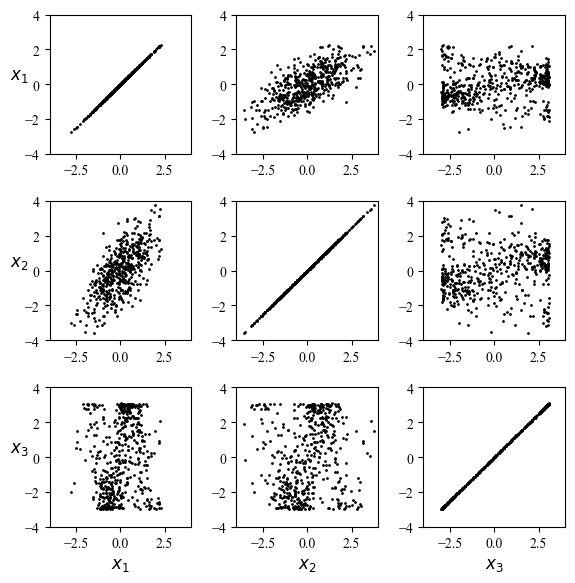

In [ ]:
# load data into scatter matrix
pca3d = np.genfromtxt(fname = 'data/pca-data-3d.txt', delimiter=',', 
                       dtype = np.float64, skip_header=1)
print("Data Shape:", pca3d.shape) # (always helpful to check the shape of the data, in case unsure, here: 10x2)

# center data
pca3d_C=pca3d-pca3d.mean(axis=0) 

# plot scatter plot matrix
fig4=plt.figure(figsize=(6,6))
for i in [0, 1, 2]: # vertical index
    for j in [0, 1, 2]: # horiontal index
        plt.subplot(3, 3, i*3+j+1) # subplot index starts at 1
        plt.tight_layout() # creates good spacing between plots
        plt.scatter(pca3d_C[:,j], pca3d_C[:,i],s=1,color='k')
        plt.xlim((-4,4))
        plt.ylim((-4,4))
        if j==0:
            plt.ylabel('$x_{}$'.format(i+1), rotation=0) # vertical label
        if i==2:
            plt.xlabel('$x_{}$'.format(j+1)) # horizontal label 
plt.show()

#### (a) Determine the PCs and make the analogous scatter plot matrix for the 2d-coordinate systems
spanned by the different pairs of PCs.

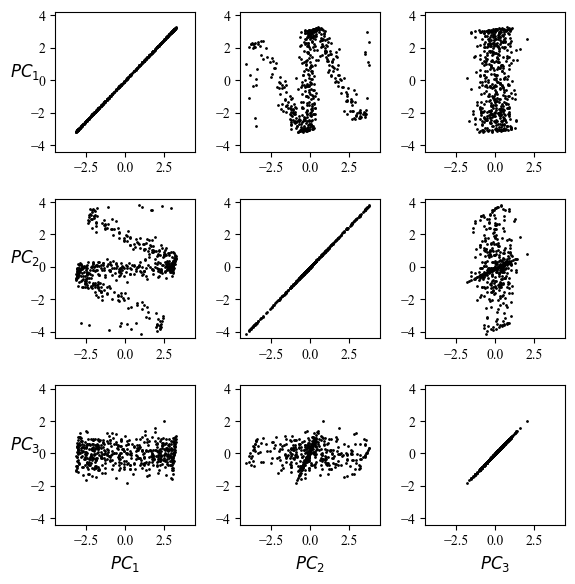

In [18]:
# find PCs
C3d=np.cov(pca3d_C,rowvar=False) # calculate covariance matrix (rowvar adapts function to our data shape)
evals3d,PCs3d=np.linalg.eig(C3d) # calculate eigenvalues and PCs, np.linalg already normalizes PCs

# make sure PCs are ordered in descending Eval order
sorter3d=np.argsort(evals3d)[::-1] # sorted indices of evals in descending order
evals3d=evals3d[sorter3d] # sorted evals
PCs3d=PCs3d[:,sorter3d] # sorted PCs(for numpy.linalg.eig each PC is a column)



# project data onto PCs and get projection coordinates
u3d=pca3d_C@PCs3d

# plot scatter plot matrix using 2d-coordinates systems spanned by different PCs
fig5=plt.figure(figsize=(6,6))
for i in [0, 1, 2]: # vertical index
    for j in [0, 1, 2]: # horiontal index
        plt.subplot(3, 3, i*3+j+1) # subplot index starts at 1
        plt.tight_layout() # creates good spacing between plots
        plt.scatter(u3d[:,j], u3d[:,i],s=1,color='k')
        plt.xlim((-4.5,4.5))
        plt.ylim((-4.4,4.2))
        if j==0:
            # Have y-axis label text appear horizontal
            plt.ylabel('$PC_{}$'.format(i+1), rotation=0) # vertical label
        if i==2:
            plt.xlabel('$PC_{}$'.format(j+1)) # horizontal label 
plt.show()

#### (c) Examine the 3d-reconstruction of the data in the original coordinate systems when using only (i) the first, (ii) the first two or (iii) all three PCs for reconstruction. Discuss how useful these principal directions are.

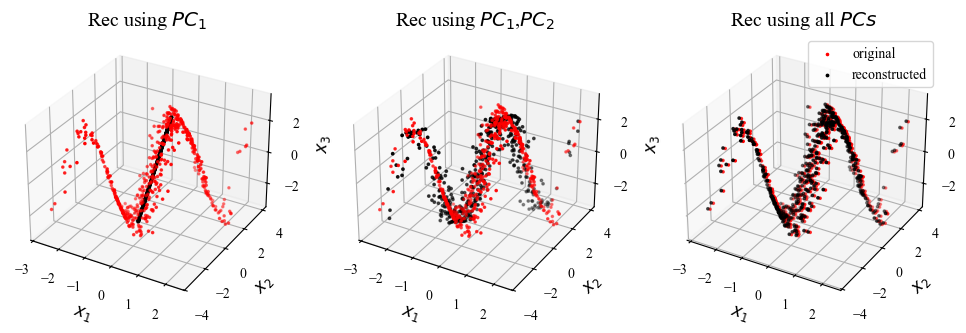

In [19]:
# Reconstruction using PCs as directions and projection coordinates as length in directions
# with PC1
pca3d_Crec1=PCs3d[:,0].reshape(3,1)@u3d[:,0].reshape(1,500)
# with PC1,PC2
pca3d_Crec2=PCs3d[:,0:2]@u3d[:,0:2].T
# with all PCs
pca3d_Crec=PCs3d@u3d.T


# Plot
recs = [pca3d_Crec1, pca3d_Crec2, pca3d_Crec] # list of reconstructions
titles = ['Rec using $PC_1$', 'Rec using $PC_1$,$PC_2$', 'Rec using all $PCs$'] # plot titles

fig6 = plt.figure(figsize=(12, 6))

for i, (rec, title) in enumerate(zip(recs, titles), 1): # iterate over reconstructions
    ax = fig6.add_subplot(1, 3, i, projection='3d') # create each subplot, 3d figures
    ax.set_title(title)
    ax.scatter(pca3d[:, 0], pca3d[:, 1], pca3d[:, 2], s=2.5, color='r', label="original")
    ax.scatter(rec[0, :], rec[1, :], rec[2, :], s=3, color='k',label="reconstructed")
    ax.set(xlabel='$x_1$', ylabel='$x_2$', zlabel='$x_3$')

plt.legend()
plt.show()

### H1.3

#### (a) Find the 20 Principal Components of this dataset.

In [ ]:
# load data
expdat = np.genfromtxt(fname='data/expDat.txt', delimiter=',', 
                       dtype=np.int64, skip_header=1)[:,1:]

# define a time index
time = np.arange(1, expdat.shape[0]+1)

In [22]:
# find PCs
expdat_C=expdat-expdat.mean(axis=0) # center data
C_exp=np.cov(expdat_C,rowvar=False) # compute covariance matrix
evals_exp,PCs_exp=np.linalg.eig(C_exp) # compute evals and PCs

# sort PCs
sorter_exp=np.argsort(evals_exp)[::-1]
evals_exp=evals_exp[sorter_exp]
PCs_exp=PCs_exp[:,sorter_exp]


#### (b) Plot the temporal evolution of the system projected onto the first two PCs by making: (i) and (ii)

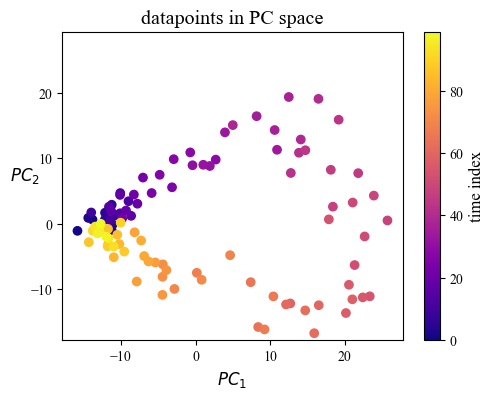

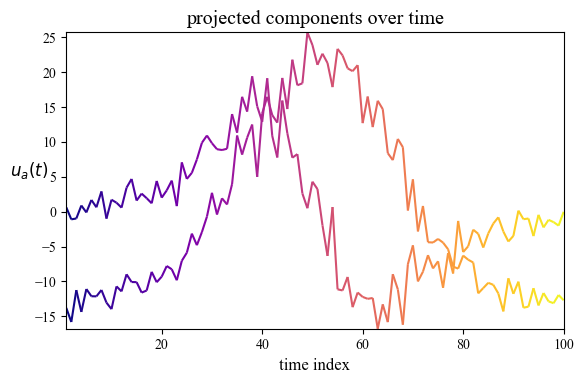

In [23]:
# first two PCs
PCsexp2=PCs_exp[:,0:2]
# project on first two PCs:
uexp=expdat_C@PCsexp2

# (i) scatter plot 
fig7=plt.figure(figsize=(5.5,4))
plt.scatter(uexp[:,0],uexp[:,1],c=np.arange(100),cmap='plasma')
cbar= plt.colorbar() # colorbar for time index
cbar.ax.set_ylabel('time index',rotation=90) # title of colorbar
plt.ylim(np.min(uexp[:,1])-1,np.max(uexp[:,1])+10) # limit of graph to max/min of y value
plt.xlabel('$PC_1$')
plt.ylabel('$PC_2$').set_rotation(0)
plt.title ("datapoints in PC space")

# (ii) line plot
# function that creates a gradient color line
def gradient_line(time, values, cmap): 
    points = np.array([time, values]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1) # format for LineCollection
    lc = LineCollection(segments, cmap=cmap, linewidth=1.5) #create LineCollection with colormap
    lc.set_array(time)
    return lc

# create figure
plt.figure(figsize=(6, 4))
ax = plt.gca() # get axes to use LineCollection
ax.set_title("projected components over time")

# add both gradient lines
ax.add_collection(gradient_line(time, uexp[:, 0], cmap='plasma'))
ax.add_collection(gradient_line(time, uexp[:, 1], cmap='plasma'))

# set limits and labels
y_min = np.min(uexp[:, [0, 1]])
y_max = np.max(uexp[:, [0, 1]])

ax.set_xlim(time.min(), time.max())
ax.set_ylim(y_min, y_max)
ax.set_xlabel('time index')
ax.set_ylabel('$u_a(t)$', rotation=0)

plt.tight_layout()
plt.show()

### (c) Create a new dataset by shuffling the data 

In [25]:
# shuffled datatset
expdat_shuff=expdat_C # create copy of expdat_C array
ind=np.arange(0,100,1) # create array of indices
for i in range(20):
    rand_ind=ind
    rand_ind=np.random.permutation(rand_ind) # randomly shuffle indices
    expdat_shuff[:,i]=expdat_C[rand_ind,i] # fill in column of shuffled values using shuffled indices
C_shuff=np.cov(expdat_shuff,rowvar=False)

#### (d) Plot the covariance matrices and scree plots for both the original and the scrambled data and interpret your results.

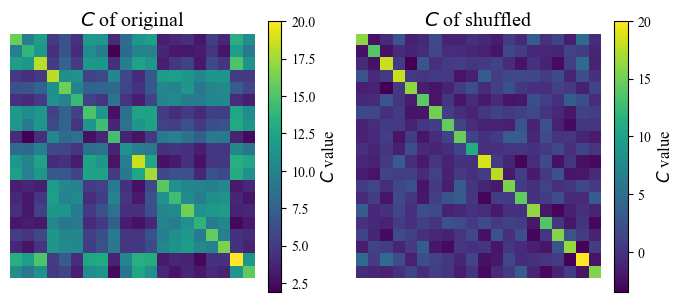

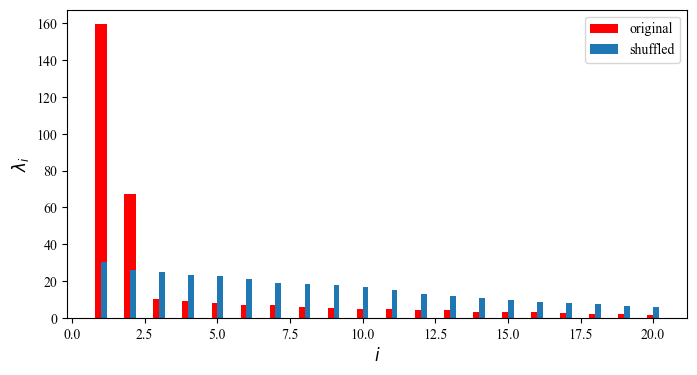

In [26]:
# plot covariance matrices
fig9, (ax1, ax2) = plt.subplots(1,2, figsize=(7,6))
im = ax1.imshow(C_exp) # displays C as image on 2d raster
ax1.set_title('$C$ of original')
cbar1=plt.colorbar(im, ax=ax1, fraction=0.05) # colorbar for values of C
cbar1.ax.set_ylabel('$C$ value',rotation=90) # title of colorbar
ax1.set_axis_off() # gets rid of axes labels
im = ax2.imshow(C_shuff) # displays C as image on 2d raster
ax2.set_title('$C$ of shuffled')
cbar2=plt.colorbar(im, ax=ax2, fraction=0.05) # colorbar for values of C
cbar2.ax.set_ylabel('$C$ value',rotation=90) # title of colorbar
ax2.set_axis_off() # gets rid of axes values
plt.tight_layout()
plt.show()


# get Evals of shuffled matrix
evals_shuff,PCs_shuff=np.linalg.eig(C_shuff)

# sort evals of shuffled matrix
evals_shuff[::-1].sort()

# plot scree plot
ind_=np.arange(1,21,1)
fig10=plt.figure(figsize=(8,4))
plt.bar(ind_,evals_exp,color='r',width=0.4,label='original')
plt.bar(ind_,evals_shuff,align='edge',width=0.2,label='shuffled')
plt.xlabel("$i$")
plt.ylabel("$\lambda_{i}$")
plt.legend()
plt.show()

## H1.4

#### (a) For each category separately: Randomly sample at least p = 5000 patches (e.g. 500 per image) of 16 ×16 = 256 pixels from this set of images and assemble them in a 256 ×p matrix.

In [3]:
# load nature and building images into two lists
images_n = [np.array(Image.open(os.path.join('data/imgpca', f)))
        for f in os.listdir('data/imgpca') if f.lower().startswith('n')] # load nature images
images_b = [np.array(Image.open(os.path.join('data/imgpca', f)))
        for f in os.listdir('data/imgpca') if f.lower().startswith('b')] # load building images


p_im=500 # number of patches per image

# create a sampler function to sample p_im random patches per image from all images in a list
def sampler(im_list):
    samples=np.zeros((len(im_list)*p_im,256)) # patches array
    for i,im in enumerate(im_list): # enumeration over images
        patch_ind_x=np.random.randint(0,im.shape[0]-16+1,size=p_im) # get p_im random x vals of upper left pixel of patch
        patch_ind_y=np.random.randint(0,im.shape[1]-16+1,size=p_im) # get p_im random y vals of upper left pixel of patch
        
        for  j,(x, y) in enumerate(zip(patch_ind_x, patch_ind_y)): #load p_im random patches into patches array
            samples[i*p_im+j,:]=im[x:x+16,y:y+16].reshape(-1)
    
    return samples

# sample nature images
patches_n_256=sampler(images_n)      
#sample building images
patches_b_256=sampler(images_b)      

#### (b) Calculate the PCs of these image patches and visualize the direction of the first 24 PCs as 16 ×16 images. Are there differences between the PC “images” of buildings vs. nature?

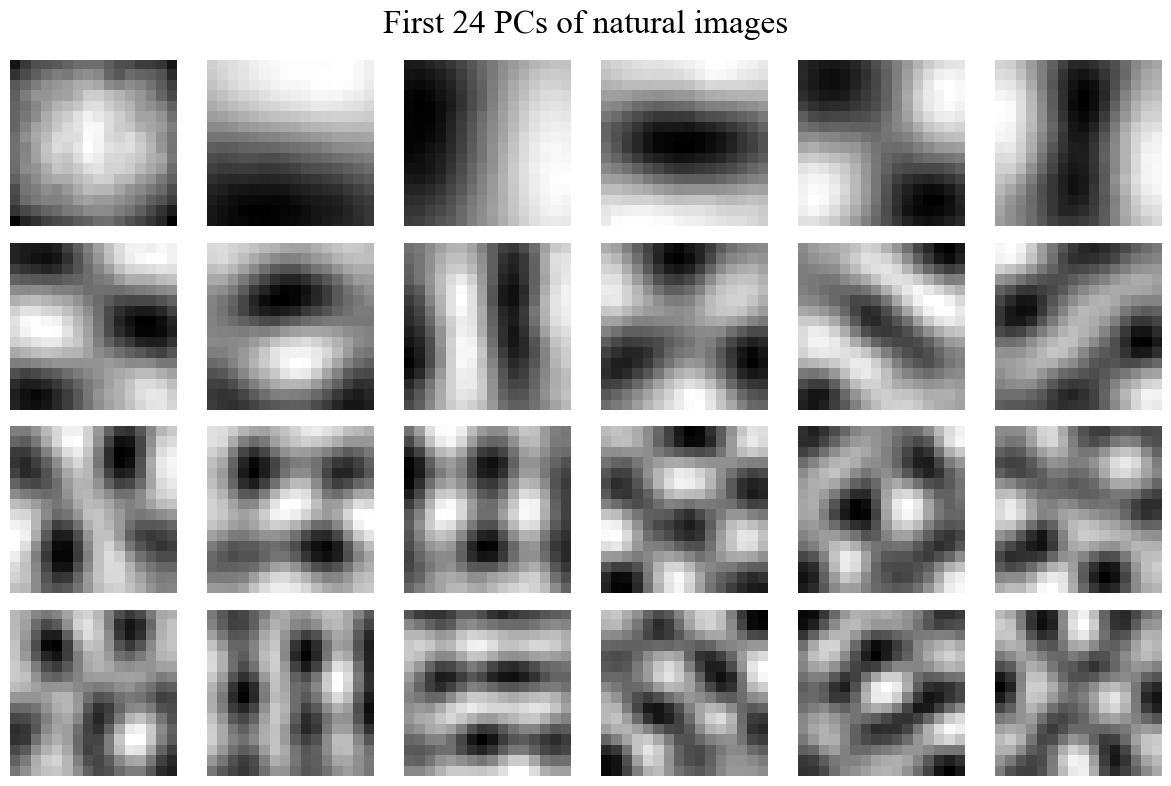

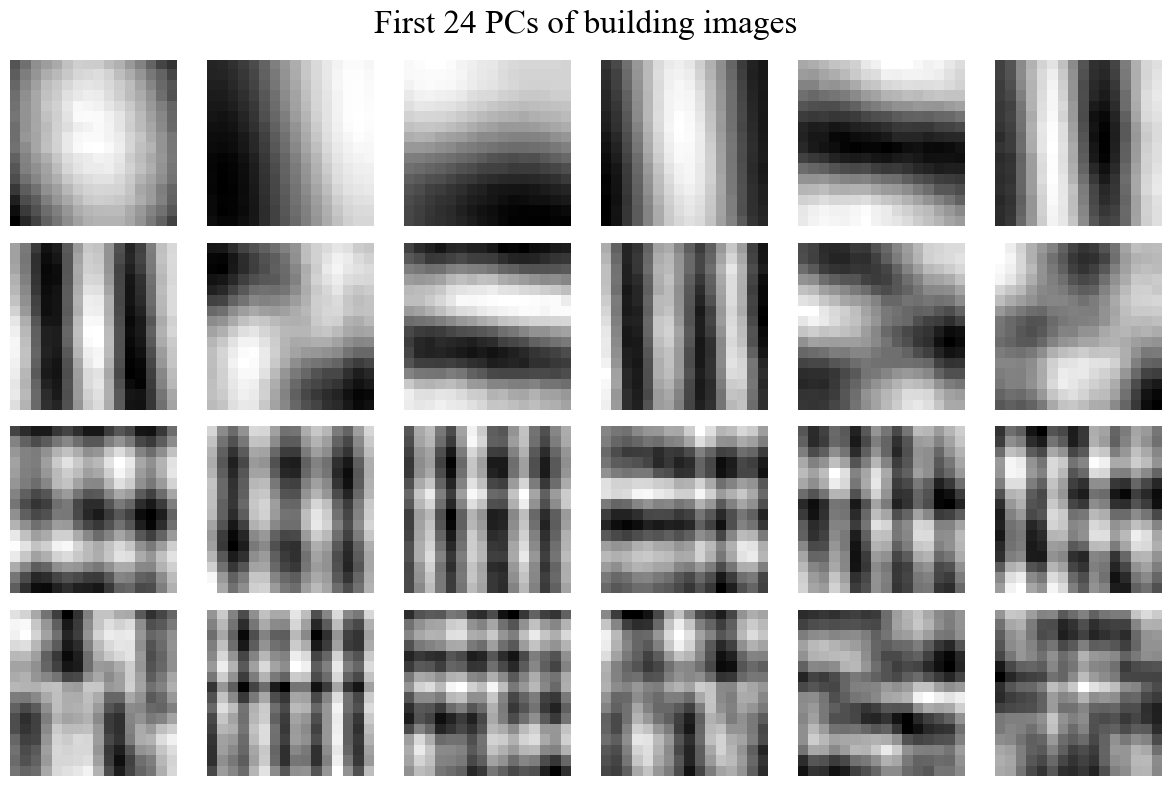

In [30]:
# find PCs for nature and buildings

#create a PCA calculation and visualization class
class CalcVis:
    def __init__(self, data,name):
        self.name=name
        self.data = data
        self.data_c=self.data-self.data.mean(axis=0) # data needs shape (p,.)
        self.C=np.cov(self.data_c,rowvar=False) # covariance matrix (data needs shape (p,.))
        evals,PCs=np.linalg.eigh(self.C) # compute evals and PCs
        sorter=np.argsort(evals)[::-1]; self.evals=evals[sorter];
        self.PCs=PCs[:,sorter]# sort PCs in descending order of evals

    # get Evals and PCs
    def PCA(self): 
        return self.evals,self.PCs
        

    # get first n PCs
    def first_n_PCs(self,n): 
        return self.PCs[:,:n]
        
    # project some data on PCs (data shape needs to be (p,.))
    def project_n_PCs(self,data,n): 
        u=data@self.PCs[:,:n]
        return u

    # Reconstruct data from projection (projection shape needs to be (p,.))
    def reconstruction(self,project): # projection is an argument, its shape is the base for reconstruction
        data_r=project@self.PCs[:,:project.shape[1]].T
        return data_r

    # plot screeplot for n PCs
    def scree_plot(self,comp_evals,comp_name,n=256): # Evals for comparison and a corresponding name are arguments
        i=np.arange(1,n+1,1) # PC index
        fig=plt.figure(figsize=(8,2))
        plt.yscale('log') # logscale for Evals
        plt.bar(i,self.evals[:n],color='r',width=0.6,label=self.name) # Screeplot for own Evals
        plt.bar(i,comp_evals[:n],align='edge',width=0.4,label=comp_name) # Screeplot for Evals from argument
        plt.xlabel("$i$")
        plt.ylabel("$\lambda_{i}$")
        plt.legend()
        plt.show()
        
    # plot patches: first index should be number of images
    def patch_vis(self,patches,title): 
        patches = patches.T.reshape(-1, 16, 16) #reshape into image form
        fig, axes = plt.subplots(4, 6, figsize=(12, 8))  

        for i, ax in enumerate(axes.flat):
            ax.imshow(patches[i,:,:], cmap='gray')
            ax.axis('off')
            
        plt.suptitle(title,fontsize=24)
        plt.tight_layout()
        plt.show()

    # extract non-overlapping patches from image
    def extr_n_o(self,im):
        nx=im.shape[0]//16 # number of patches that fit in one direction
        if im.shape[0]%16!=0: # in case boundary region without patch: add one 
            nx+=1
        ny=im.shape[1]//16 # same for other dir
        if im.shape[1]%16!=0: # same for other dir
            ny+=1

        patches=np.zeros((nx*ny,256)) # patches array (number of patches, 256)
        i=0
        for x in range(nx): # loop along one direction
            for y in range(ny): # loop along other dir
                x_=x*16
                y_=y*16 # x,y for the upper left pixel of patch
                if x==nx-1:
                    x_=im.shape[0]-16 
                if y==ny-1:
                   y_=im.shape[1]-16 # # x,y for upper left pixel of boundary patch

                patches[i,:]=im[x_:x_+16,y_:y_+16].reshape(-1) # patches loaded into patches array
                i+=1
                
        return nx,ny,patches


    #reconstruct image for display from patches array (number of patches, 256)
    def reconstr_ima(self,patches,ny,nx,n=16): #arguments that are returned by extraction function
        patches=patches.reshape(-1,n,n)
        rec=np.zeros((ny*n,nx*n)) # shape of image

        for i in range(ny):
            for j in range(nx):
                idx=i*nx+j # index of patch 
                rec[i*n:(i+1)*n,j*n:(j+1)*n]=patches[idx] # patch put into right place (from left to right, top to bottom)

        return rec
        
# create a class instance for nature and plot first 24 PCs
nature=CalcVis(patches_n_256,'nature')
evals_n,PCs_n=nature.PCA()
PCs_n_24=nature.first_n_PCs(24)
nature.patch_vis(PCs_n_24, 'First 24 PCs of natural images')

 #create a class instance for buildings and plot first 24 PCs
buildings=CalcVis(patches_b_256, 'buildings')
evals_b,PCs_b=buildings.PCA()
PCs_b_24=buildings.first_n_PCs(24)
buildings.patch_vis(PCs_b_24,'First 24 PCs of building images')

#### (c) Answer using a scree plot: How many PCs should you keep for each of the two categories? What are the resulting respective compression ratios (qualitatively)?

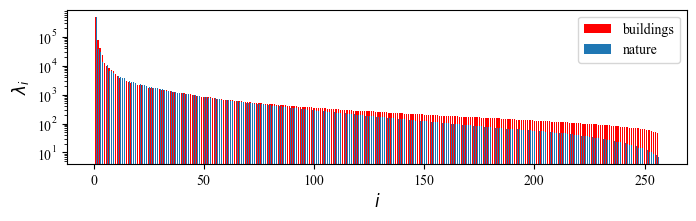

In [31]:
# use scree plot function from CalcVis class
buildings.scree_plot(evals_n,'nature')

#### (d) Pick any 3 images from each category. For each image: (i) Project all non-overlapping1 16 ×16-patches onto the first M PCs of that image’s category (e.g. if it’s a building image, project it using the first M building PCs) for M ∈{1,2,4,8,16,100}. (ii) Reconstruct the projected image patches by using: “matching” PCs (i.e. building PCs for reconstructing building image patches and nature PCs for nature image reconstruction) as well as the “wrong” PCs (i.e. building PCs for nature image reconstruction, nature PCs for building image reconstruction)

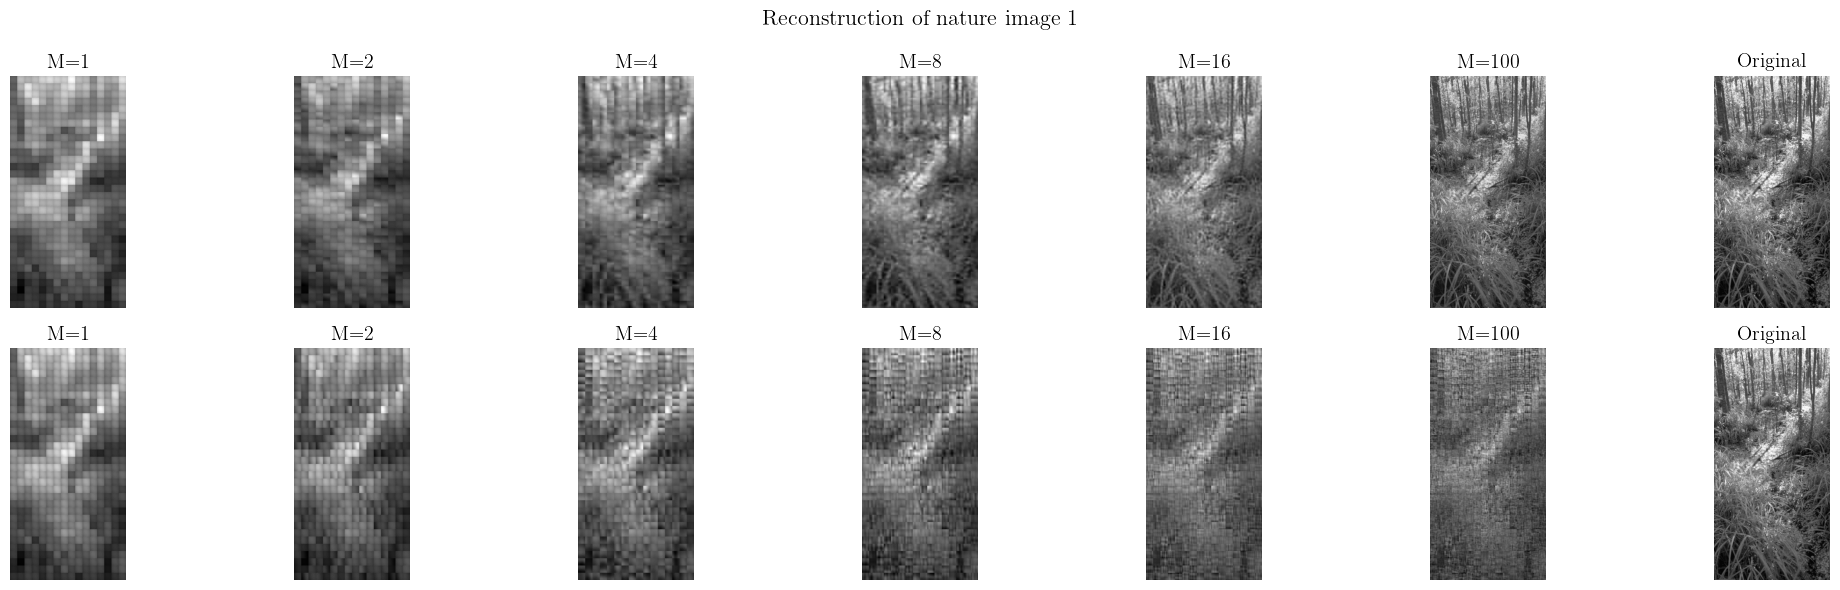

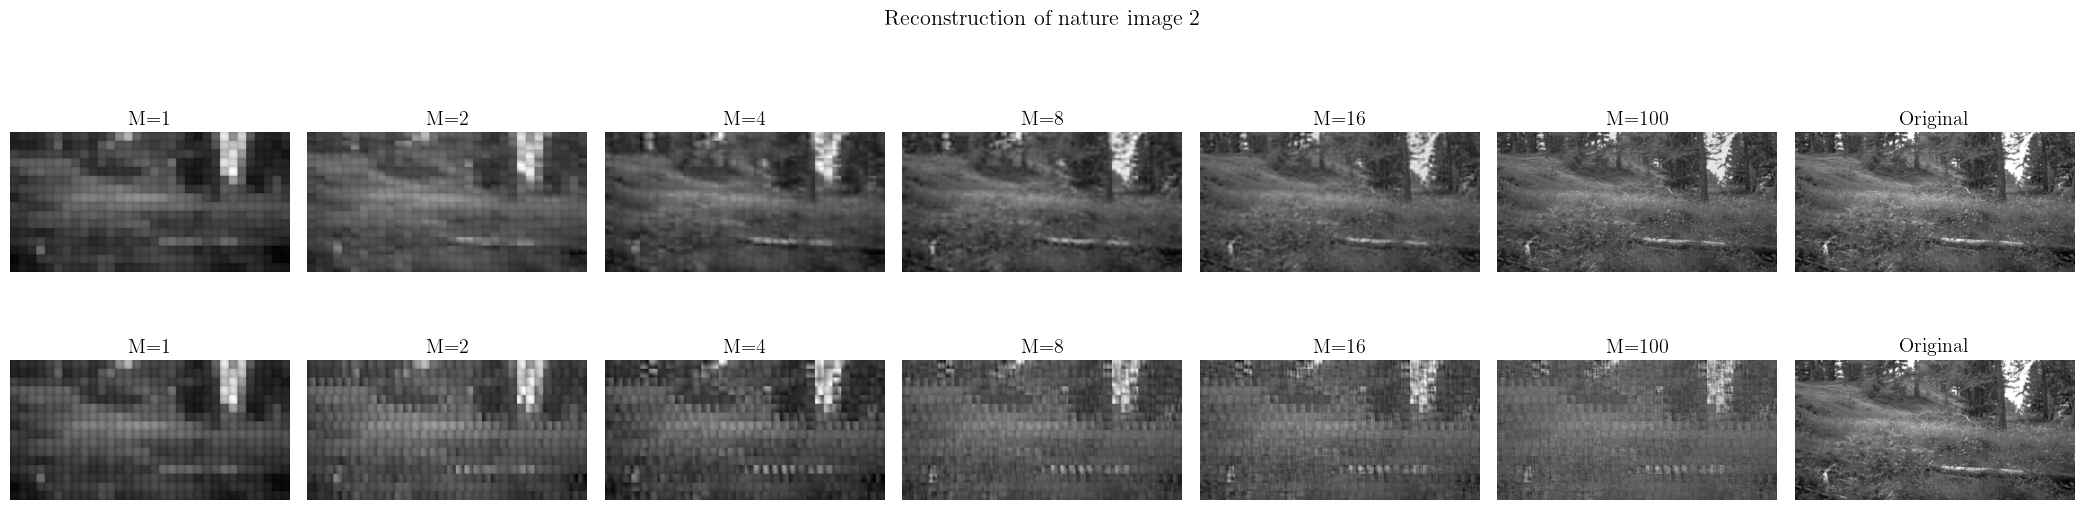

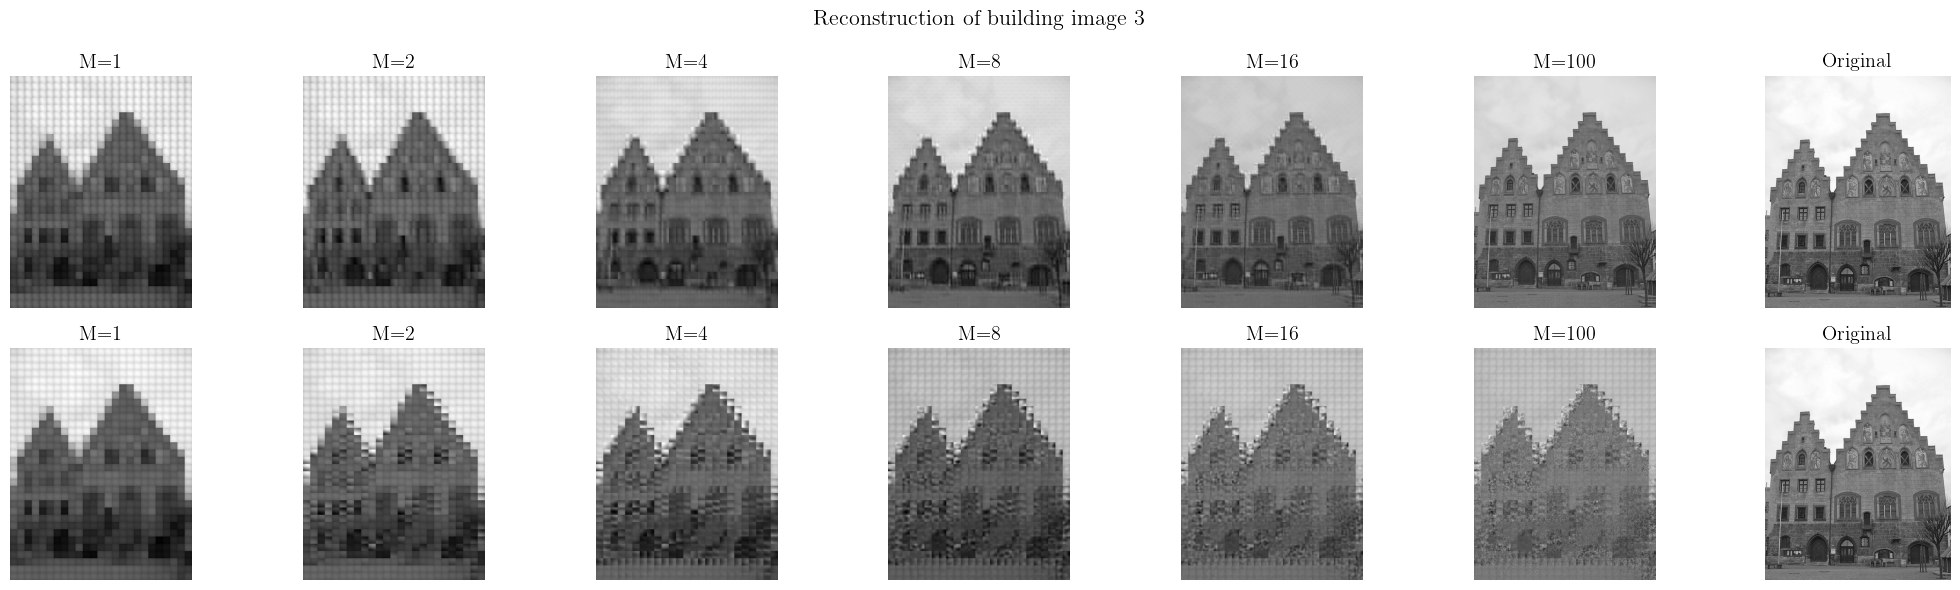

In [19]:
# we pick three images
images_n4 = [np.array(Image.open(os.path.join('imgpca', f)))
        for f in os.listdir('imgpca') if f.lower().startswith('n12') or f.lower().startswith('n2')] # load nature images
images_b4 = [np.array(Image.open(os.path.join('imgpca', f)))
        for f in os.listdir('imgpca') if f.lower().startswith('b6')] # load building images


# visualziation loop 
M = [1, 2, 4, 8, 16, 100] # number of PCs
selected_images=[(images_n4[0],nature,buildings,'nature'),
                    (images_n4[1],nature,buildings,'nature'),
                    (images_b4[0],buildings,nature,'building')] # list of images with the two classes required for projection and reconstruction

for idx, (image, match_cls, wrong_cls, label) in enumerate(selected_images):

    # extract patches from image
    nx, ny, patches = match_cls.extr_n_o(image)

    # define plot (2 rows for wrong and matching PCs, and M+1 columns for different number of PCs and original image)
    fig, axes = plt.subplots(2, len(M)+1, figsize=(3*(len(M)+1), 6))

    for i, m in enumerate(M):
        # Matching projection/reconstruction
        proj_m = match_cls.project_n_PCs(patches, m) # project patches on matching class PCs
        rec_m = match_cls.reconstruction(proj_m) # reconstruct patches with matching class PCs
        im_m = match_cls.reconstr_ima(rec_m, nx, ny) # reconstruct image from patches

        axes[0, i].imshow(im_m, cmap='gray')
        axes[0, i].axis('off')
        axes[0, i].set_title(f"M={m}") # display image

        # Wrong projection/reconstruction
        proj_w = match_cls.project_n_PCs(patches, m) # project patches on matching class PCs
        rec_w = wrong_cls.reconstruction(proj_w) # reconstruct patches from wrong class PCs
        im_w = match_cls.reconstr_ima(rec_w, nx, ny) # reconstruct image from patches

        axes[1, i].imshow(im_w, cmap='gray')
        axes[1, i].axis('off')
        axes[1, i].set_title(f"M={m}") # display image

    # Last column: original image
    axes[0, -1].imshow(image, cmap='gray')
    axes[0, -1].set_title("Original")
    axes[0, -1].axis('off')

    axes[1, -1].imshow(image, cmap='gray')
    axes[1, -1].set_title("Original")
    axes[1, -1].axis('off')

    axes[0, 0].set_ylabel("Matching PCs")
    axes[1, 0].set_ylabel("Wrong PCs")

    axes[0, 0].set_ylabel("Matching PCs", fontsize=12)
    axes[1, 0].set_ylabel("Wrong PCs", fontsize=12)

    plt.suptitle(f"Reconstruction of {label} image {idx+1}", fontsize=16)
    plt.tight_layout()
    plt.show()